In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import xgboost as xgb

In [73]:
%%query_hive --hiveserver prod-agatti-dp-m-2
SELECT
    -- user_regions[0] region,
    dt date,
    user_country_code,
    CAST(CAST(server_timestamp AS DOUBLE)/60000. AS BIGINT) minute,
    COUNT(1) num_calls
FROM dwh.fact_call
WHERE (dt BETWEEN '20190615' AND '20190617' OR dt BETWEEN '20190608' AND '20190610')
-- AND user_country_code='IN'
GROUP BY
dt,
user_country_code,
CAST(CAST(server_timestamp AS DOUBLE)/60000. AS BIGINT)
LIMIT 10000000

Query took: 2936.608123 seconds


,date,user_country_code,minute,num_calls
0,20190608,None,25999718,46530
1,20190608,AE,25999955,2963
2,20190608,AG,25999893,1
3,20190608,AL,25999738,780
4,20190608,AM,25999707,19
5,20190608,AO,25999645,528
6,20190608,AR,25999552,14
7,20190608,AU,25999459,988
8,20190608,AU,26000558,179
9,20190608,AZ,25999304,31


In [74]:
df = _

In [75]:
df.shape

(1078566, 4)

In [38]:
df.columns
#df.columns = ['dt','user_country_code','minute','calls']

Index(['date', 'user_country_code', 'minute', 'num_calls'], dtype='object')

In [39]:
df.sort_values('minute',inplace=True)

In [ ]:
#df.query("dt=='20190609' & user_country_code=='IN' & minute>2.599e7 & minute<2.6e7")

In [71]:
cut1 = (df['date']<='20190611') & (df['user_country_code']=='IN')# & (df['minute']>0) & (df['minute']<=1440)
cut2 = (df['date']>='20190615') & (df['user_country_code']=='IN')# & (df['minute']>0) & (df['minute']<=1440)
df1 = df[cut1].copy()
df2 = df[cut2].copy()

min1 = df1['minute'].min()
min2 = df2['minute'].min()
print(min1)
print(min2)
df1['minute'] = df1['minute']+(min2-min1)

25999200
26009280


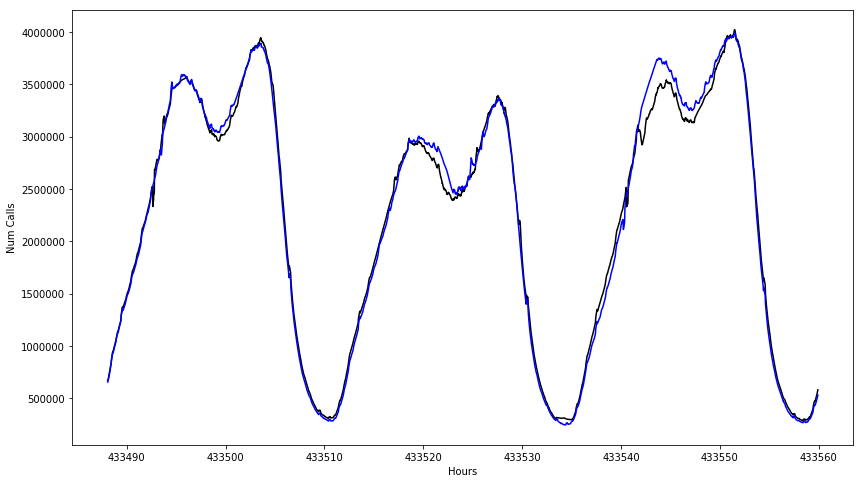

In [72]:
plt.figure(figsize=(14,8))
plt.xlabel('Hours')
plt.ylabel('Num Calls')
#cut = (df['date']=='20190609') & (df['user_country_code']=='PK')# & (df['minute']>0) & (df['minute']<=1440)
plt.plot(df1['minute'].rolling(10).mean()/60.,df1['num_calls'].rolling(10).mean(),color='black')

#cut = (df['date']=='20190616') & (df['user_country_code']=='PK')# & (df['minute']>0) & (df['minute']<=1440)
plt.plot(df2['minute'].rolling(10).mean()/60.,df2['num_calls'].rolling(10).mean(),color='blue')
plt.show()